In [1]:
from sklearn import datasets
import numpy as np
# Irisデータセットをロード
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Label counts in y:', np.bincount(y))

Label counts in y: [50 50 50]


In [4]:
print('Label counts in y_train:', np.bincount(y_train))

Label counts in y_train: [35 35 35]


In [5]:
print('Label counts in y_test:', np.bincount(y_test))

Label counts in y_test: [15 15 15]


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
# 訓練データの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [10]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のデータ点の個数を表示
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [11]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [12]:
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3,  cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # クラスごとにデータをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')
    # テストデータを目立たせる
    if test_idx:
        # 全てのデータ点をプロット
        X_test, y_test = X[test_idx, :],y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='test set')

/opt/homebrew/Caskroom/miniforge/base/envs/scikit/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/scikit/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/scikit/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/var/folders/qy/38qlvhzx5vb0bwwrbdm4q7_80000gn/T/ipykernel_13919/3261527366.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],


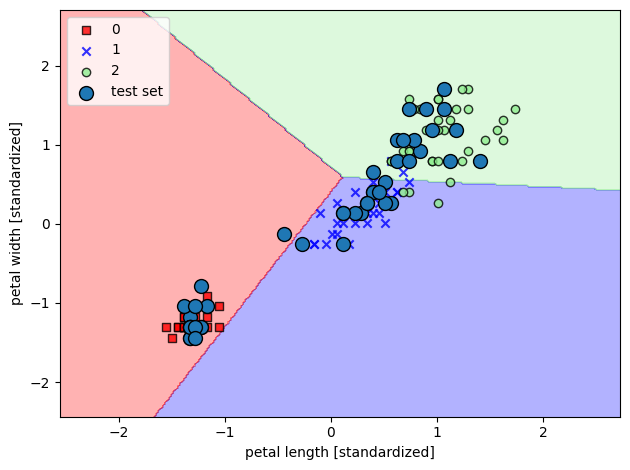

In [14]:
# 訓練データとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# 訓練データとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn,
                      test_idx=range(105,150))
# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例の設定
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
class LogisticRegressionGD():
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        # 訓練回数までデータを反復処理
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # 誤差平方和のコストではなくロジスティック回帰のコストを計算することに注意
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            # エポックごとのコストを格納
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        # 総入力を計算
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        # ロジスティックシグモイド活性化関数を計算
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        # 1ステップ後のクラスラベルを返す
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

/var/folders/qy/38qlvhzx5vb0bwwrbdm4q7_80000gn/T/ipykernel_13919/3261527366.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],


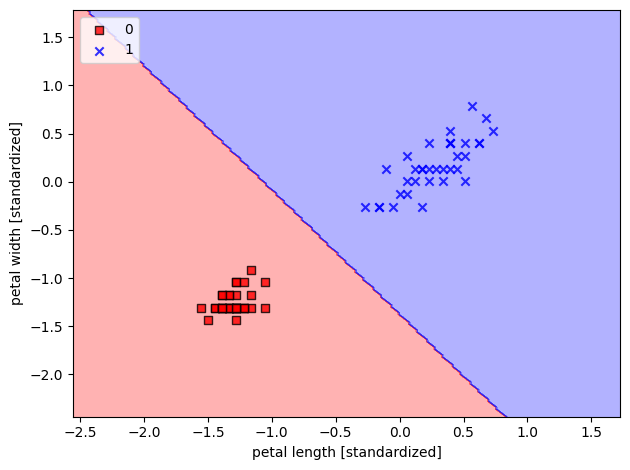

In [16]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
# ロジスティック回帰のインスタンスを生成
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
# モデルを訓練データに適合させる
lrgd.fit(X_train_01_subset, y_train_01_subset)
# 決定領域をプロット
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/scikit/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/scikit/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/scikit/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/homebrew/Caskroom/miniforge/base/envs/scikit/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/var/folders/qy/38qlvhzx5vb0bwwrbdm4q7_80000gn/T/ipykernel_13919/3261527366.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an

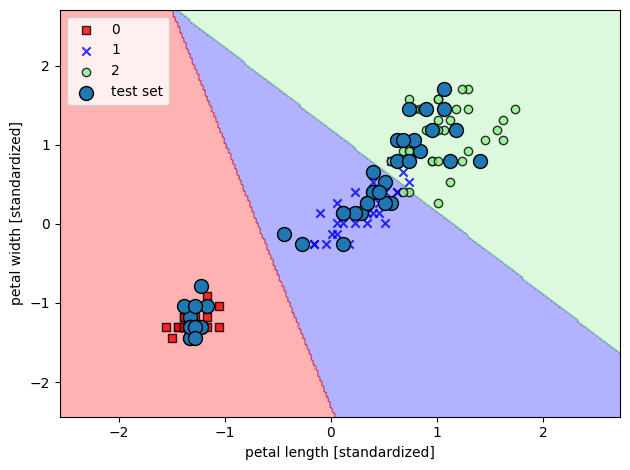

In [17]:
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
# 訓練データをモデルに適合させる
lr.fit(X_train_std, y_train)
# 決定境界をプロット
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
lr.predict_proba(X_test_std[:3,:])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

In [19]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [22]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])